In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
path = "C:/Users/karan/Downloads/Adidas_US_Sales_Datasets.xlsx"
df = pd.read_excel(path,skiprows=4)

In [3]:
df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [6]:
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


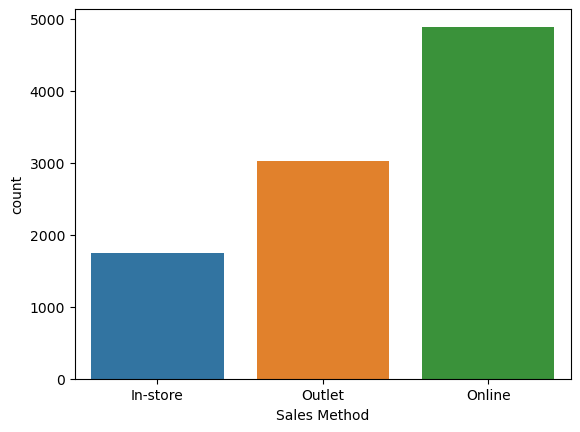

In [7]:
sns.countplot(x='Sales Method', data=df)
plt.show()


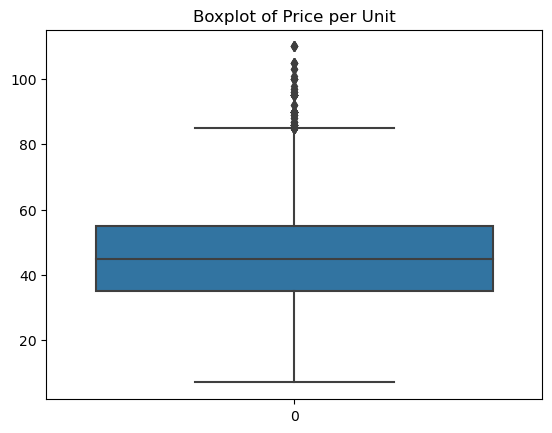

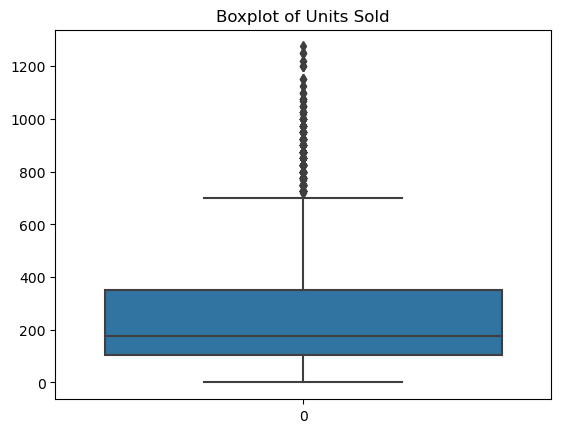

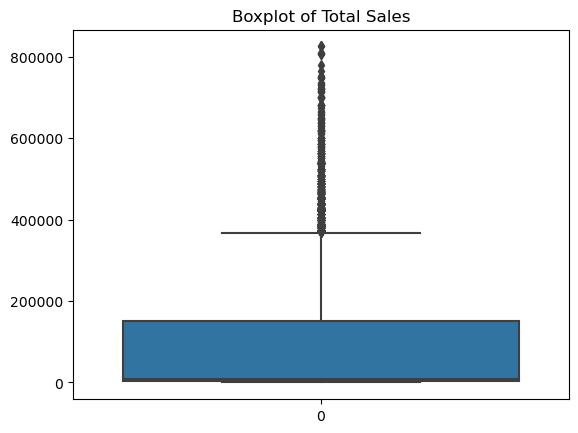

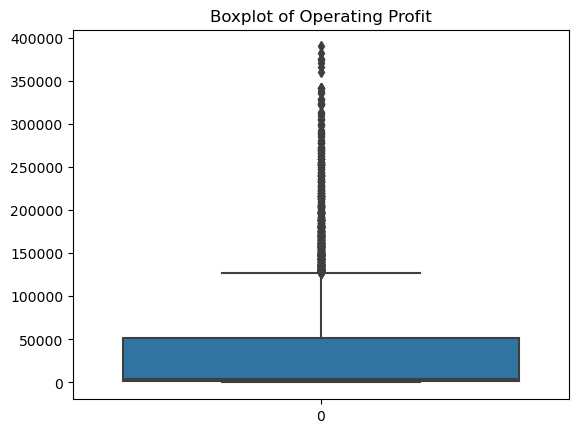

In [8]:
features = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit']
for feature in features:
    sns.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [9]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df = remove_outliers(df, features)

In [10]:
threshold_value = df['Total Sales'].quantile(0.25)  # example threshold
df['Churn'] = np.where(df['Total Sales'] < threshold_value, 1, 0)

In [11]:
features = ['Price per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin']
X = df[features]
y = df['Churn']

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1640
           1       0.96      0.92      0.94       567

    accuracy                           0.97      2207
   macro avg       0.96      0.95      0.96      2207
weighted avg       0.97      0.97      0.97      2207



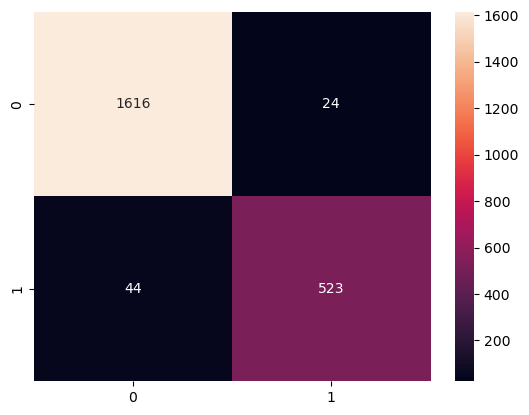

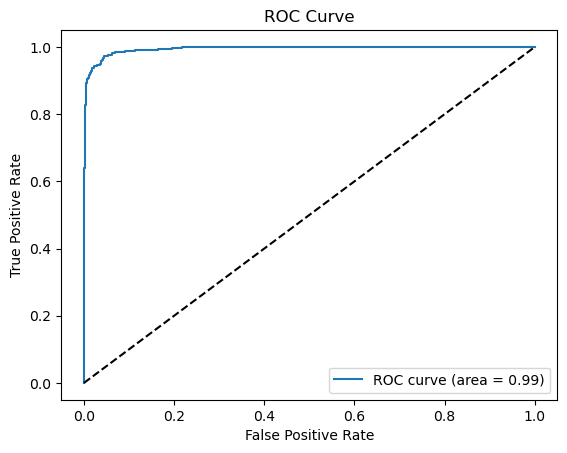

In [15]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [16]:
from sklearn.linear_model import LinearRegression


In [17]:
features = ['Price per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin']
X = df[features]
y = df['Total Sales']


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [20]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

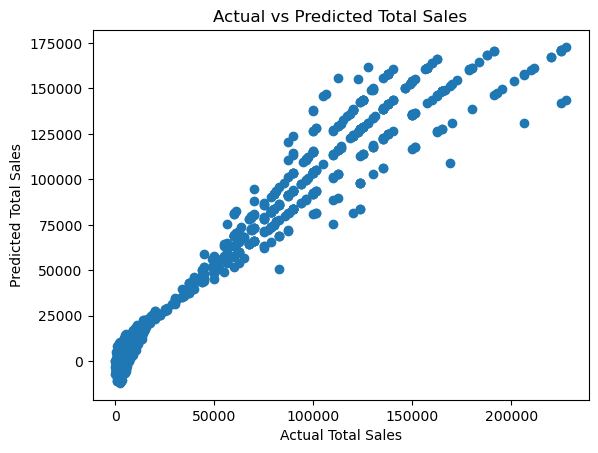

In [21]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Total Sales')
plt.ylabel('Predicted Total Sales')
plt.title('Actual vs Predicted Total Sales')
plt.show()


C:\Users\karan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\karan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\karan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\karan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\karan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\karan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid f

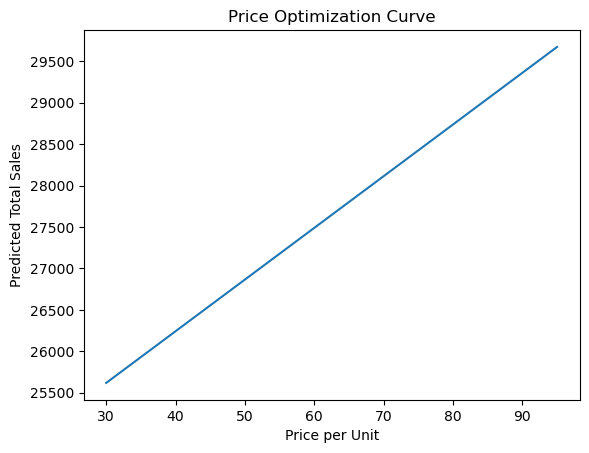

In [22]:
def predict_sales(price):
    avg_units_sold = df['Units Sold'].mean()
    avg_operating_profit = df['Operating Profit'].mean()
    avg_operating_margin = df['Operating Margin'].mean()
    
    sample = np.array([[price, avg_units_sold, avg_operating_profit, avg_operating_margin]])
    sample_scaled = scaler.transform(sample)
    return regression_model.predict(sample_scaled)[0]

# Example: Predict sales for a range of prices
prices = np.arange(30, 100, 5)
predicted_sales = [predict_sales(price) for price in prices]

plt.plot(prices, predicted_sales)
plt.xlabel('Price per Unit')
plt.ylabel('Predicted Total Sales')
plt.title('Price Optimization Curve')
plt.show()
